Importamos las librearías necesarias.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creamos el DataFrame.

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


A continuación, vamos a filtrar los datos ya que nos dan demasiada información. Nos quedaremos con las columnas que nos interesan.

In [4]:
df.isnull().sum()
df.duplicated().sum()
print(df.duplicated().sum(), 'duplicated rows'), print(df.isnull().sum(), 'null values')

0 duplicated rows
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64 null values


(None, None)

Gráfica de dispersión de la variable a predecir (Price) con respecto a cada una de las variables independientes.

c:\Users\1cnac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


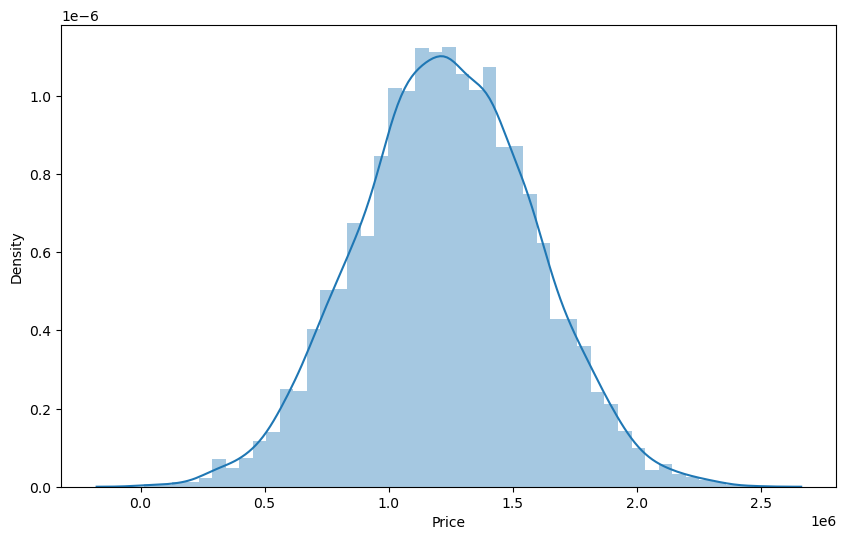

In [5]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Price'])
plt.show()


Gráfica de correlación entre las variables.

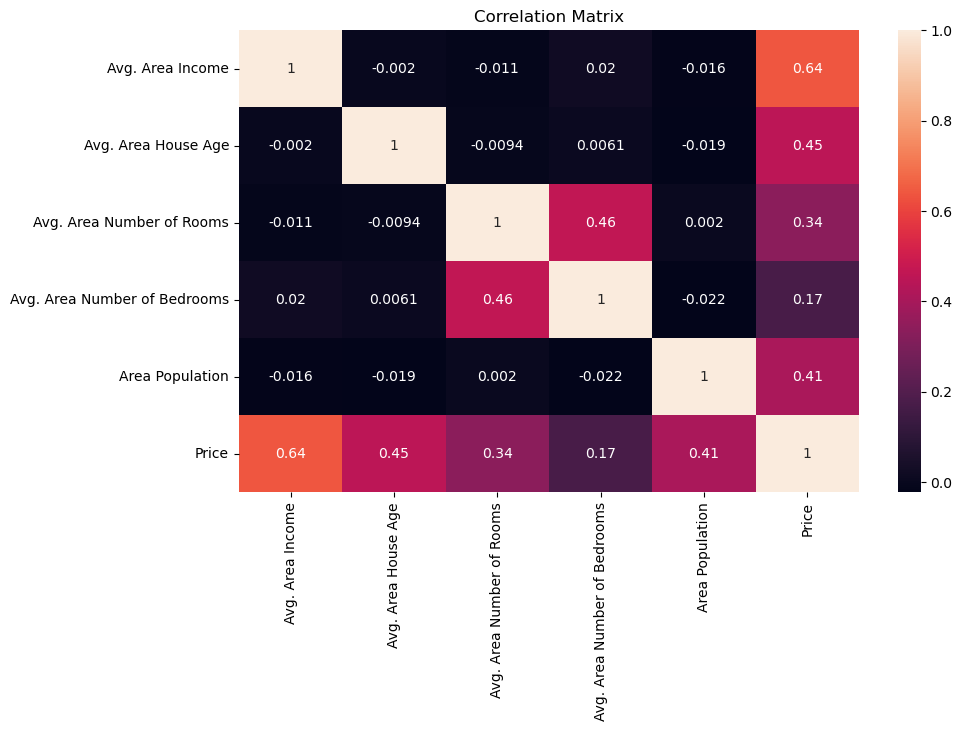

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()



Gráfico de barras en relación al rango de población y su precio promedio.

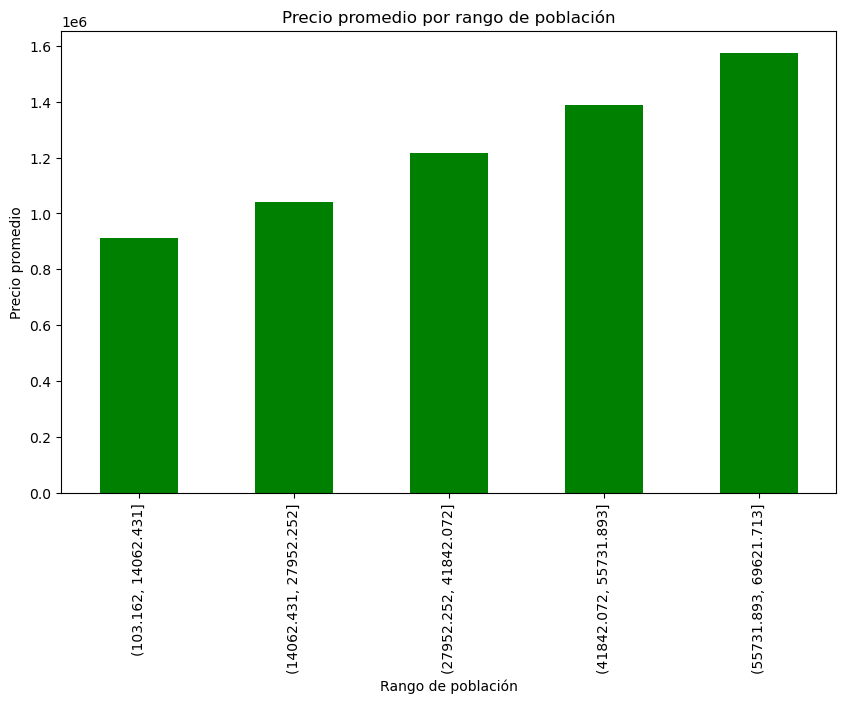

In [9]:
rangos_poblacion = pd.cut(df['Area Population'], 5)
precio_promedio = df['Price'].groupby(rangos_poblacion).mean()

plt.figure(figsize=(10, 6))
precio_promedio.plot(kind='bar', color='green')
plt.title('Precio promedio por rango de población')
plt.xlabel('Rango de población')
plt.ylabel('Precio promedio')
plt.show()



Regresión lineal de la edad de la casa y su precio.

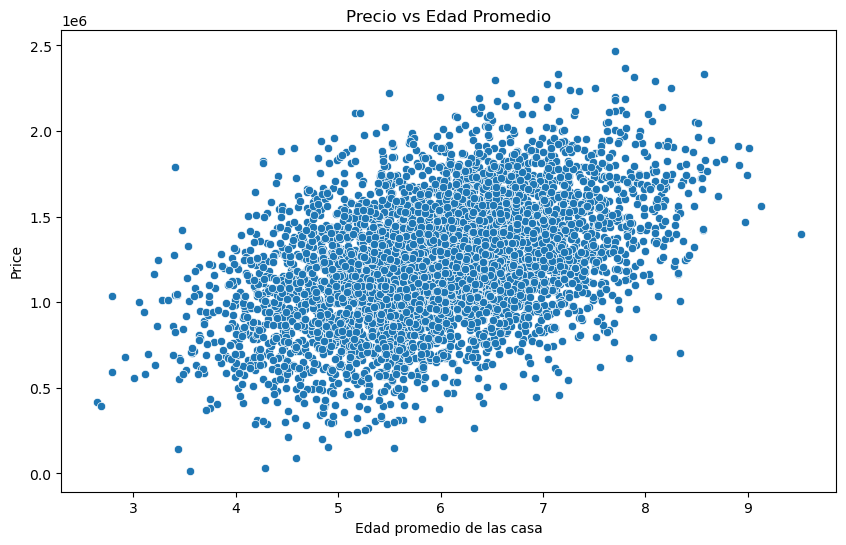

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. Area House Age', y='Price', data=df)
plt.title('Precio vs Edad Promedio')
plt.xlabel('Edad promedio de las casa')
plt.ylabel('Price')
plt.show()

Regresión lineal del ingreso promedio de la zona y su precio.

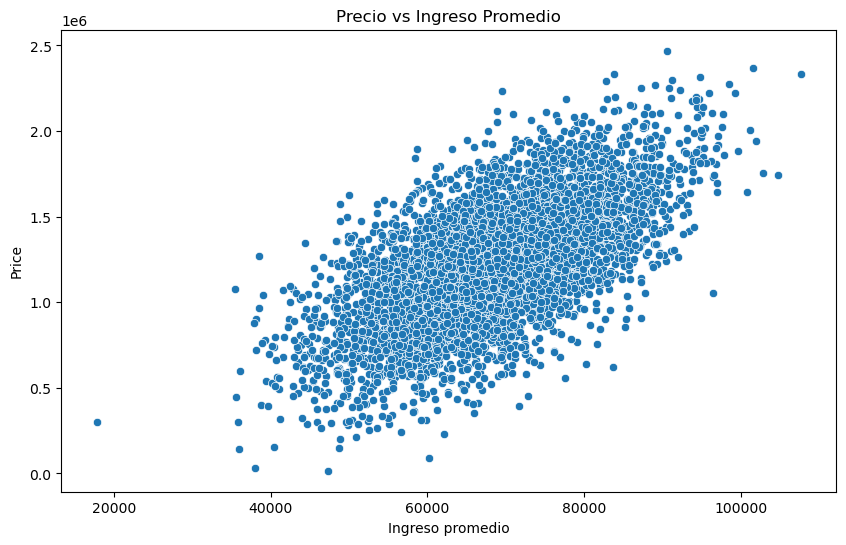

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. Area Income', y='Price', data=df)
plt.title('Precio vs Ingreso Promedio')
plt.xlabel('Ingreso promedio')
plt.ylabel('Price')
plt.show()



Promedio de habitaciones en el área y su precio.

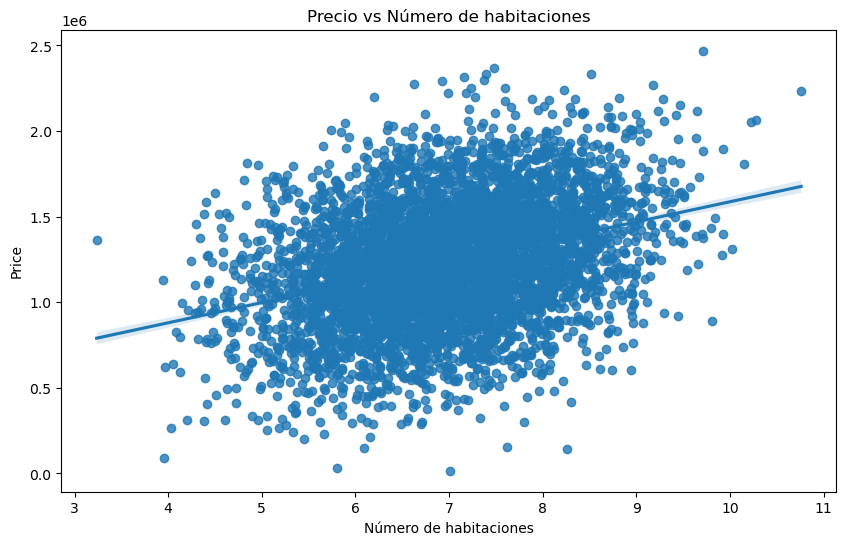

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg. Area Number of Rooms', y='Price', data=df)
plt.title('Precio vs Número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Price')
plt.show()


Promedio de número de habitaciones por casa y su precio.